In [1]:
%matplotlib inline
import __main__
__main__.pymol_argv = ['pymol','-qc'] # Pymol: quiet and no GUI
import sys, pymol
from pymol import cmd, stored
stdout = sys.stdout
pymol.finish_launching()
sys.stdout = stdout 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

In [2]:
job= "Ubiquitin_Ala"
resi = 46
sele = "N"
atom_name= "N"
pdb_file_name ='2k39.pdb'
pose = '2k39'
cmd.load(pdb_file_name )
n_states = cmd.count_states('all')
n_residues = cmd.count_atoms('name CA')
tors = np.zeros((n_states, 3))

In [3]:
def get_phi(obj, resi, state):
    """
    Get the dihedral angle phi (OR-C1-O'x-C'x) 
    """
    atom1 = '%s and resi %s and name C' % (obj, resi-1)
    atom2 = '%s and resi %s and name N' % (obj, resi)
    atom3 = '%s and resi %s and name CA' % (obj, resi)
    atom4 = '%s and resi %s and name C' % (obj, resi)
    value = cmd.get_dihedral(atom1, atom2, atom3, atom4, state=state)
    return value


def get_psi(obj, resi, state): 
    """
    Get the dihedral angle psi (C1-O'x-C'x-C'x-1)
    """
    atom1 = '%s and resi %s and name N' % (obj, resi)
    atom2 = '%s and resi %s and name CA'% (obj, resi)
    atom3 = '%s and resi %s and name C' % (obj, resi)
    atom4 = '%s and resi %s and name N' % (obj, resi+1)
    value = cmd.get_dihedral(atom1, atom2, atom3, atom4, state=state)
    return value 

def get_chi(obj, resi, state): 
    """
    Get the dihedral angle chi (C1-O'x-C'x-C'x-1)
    """
    atom1 = '%s and resi %s and name N' % (obj, resi)
    atom2 = '%s and resi %s and name CA'% (obj, resi)
    atom3 = '%s and resi %s and name CB' % (obj, resi)
    atom4 = '%s and resi %s and name CG' % (obj, resi)
    value = cmd.get_dihedral(atom1, atom2, atom3, atom4, state=state)
    return value 

In [4]:
conf = []
for s in range(1,n_states+1):    
    phis = get_phi(pose, resi, s)
    psis = get_psi(pose, resi, s)
    #chis = get_chi(pose, resi, s)
    conf.append([phis, psis])

In [5]:
tors = pd.DataFrame(conf)
tors.columns=['$\\phi$', '$\\psi$']

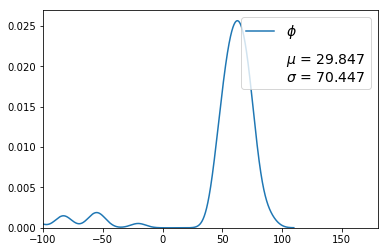

In [6]:
mu = np.mean(tors['$\\phi$'])
sigma = np.std(tors['$\\phi$'])
sns.kdeplot(tors['$\\phi$'], gridsize=50000)
plt.plot(0, label='$\\mu$ = {:.3f}\n$\\sigma$ = {:.3f}'.format(mu, sigma), alpha=0)
plt.xlim(-100,180)
#plt.xlabel("$\\phi$")
plt.legend(loc=1, fontsize=14)
plt.savefig("kde_%s_%s_$\\phi$.png" % (pose,job), dpi = 300)

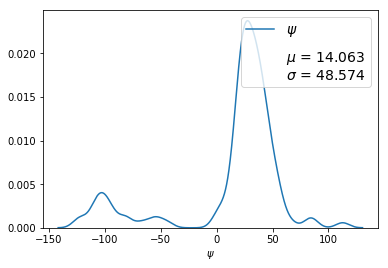

In [7]:
mu = np.mean(tors['$\\psi$'])
sigma = np.std(tors['$\\psi$'])
sns.kdeplot(tors['$\\psi$'], gridsize=50000)
plt.plot(0, label='$\\mu$ = {:.3f}\n$\\sigma$ = {:.3f}'.format(mu, sigma), alpha=0)
#plt.xlim(30, 45)
plt.xlabel("$\\psi$")
plt.legend(loc=1, fontsize=14)
plt.savefig("kde_%s_%s_$\\psi$.png" % (pose,job), dpi = 300)

In [10]:
# mu = np.mean(tors['$\\chi$'])
# sigma = np.std(tors['$\\chi$'])
# sns.kdeplot(tors['$\\chi$'], gridsize=50000)
# plt.plot(0, label='$\\mu$ = {:.3f}\n$\\sigma$ = {:.3f}'.format(mu, sigma), alpha=0)
# #plt.xlim(-71, -69)
# #plt.xlabel("$\\chi$")
# plt.legend(loc=1, fontsize=14)
# plt.savefig("kde_%s_%s_$\\chi$.png" % (pose, job), dpi = 300)